# Logistic Regression Classifier

## Loading the packages 

In [19]:
import pandas as pd
import os, glob
import re
import shutil
import pyodbc
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
%matplotlib inline
sns.set()

import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



## Uploading the Data 

In [20]:
Tdf = pd.read_excel("FamilyData.xlsx")

In [21]:
# Checking the column names
Tdf.columns

Index(['Unnamed: 0', 'AcuityScore', 'Veteran', 'HoH',
       'Days from Assessed to Housed', 'Gender', 'ethnicity', 'Age', 'race',
       'active', 'PHExits'],
      dtype='object')

# Exploratory Data Analysis (EDA) 

### Acuity Scores 

<AxesSubplot:xlabel='AcuityScore'>

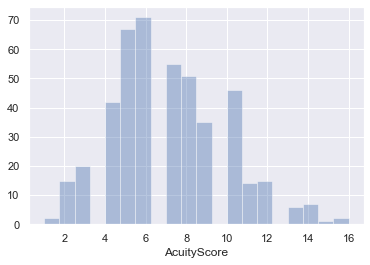

In [22]:
sns.distplot(Tdf["AcuityScore"],kde=False,bins =20)

## Relation between the Acuity Scores and the Age

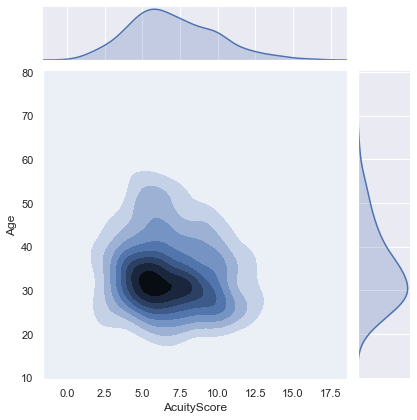

In [23]:
sns.jointplot(x="AcuityScore",y="Age",data=Tdf,kind='kde') # kde = Kernel Density Estimation.

## Acuity Score by Gender 

### we used the same labeling that HUD uses:
#### 0: female, 1:male, 3: Trans Female (FTM or Male to Female).

<AxesSubplot:xlabel='Gender', ylabel='AcuityScore'>

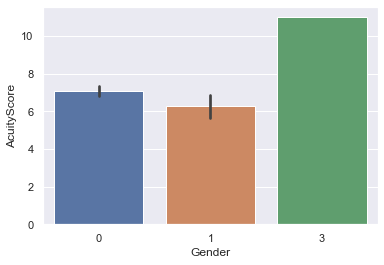

In [24]:
sns.barplot(x="Gender", y="AcuityScore",data=Tdf)

## Checking The correlation between features 

In [25]:
TdfCorr = Tdf.corr()

<AxesSubplot:>

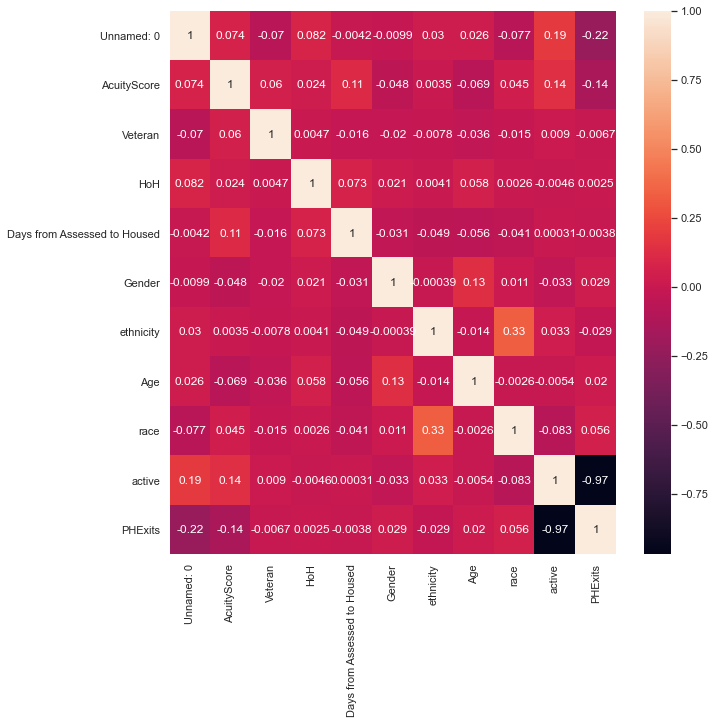

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(TdfCorr,annot=True)

## Building the classifier

In [27]:
# Selecting just some features
DataR = Tdf[['AcuityScore','Age','Days from Assessed to Housed','PHExits']]

## Preparing the Data

In [28]:
X = DataR.drop(columns=['PHExits'],axis=1)
y = DataR['PHExits']

## Training and testing data split

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Featuring Scaling 

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting the model 

In [31]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Visualizing the Coeficcients for Logistic Regression

In [32]:
colors = ['Positive' if c > 0 else 'Negative' for c in classifier.coef_[0]]


fig = px.bar(
    x=X.columns, y=classifier.coef_[0], color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting Housing Retention using Linear Regression'
)
fig.show()

## Making Predictions 

In [33]:
y_pred = classifier.predict(X_test)

## Predicting a single result 

In [34]:
print(classifier.predict(sc.transform([[9,25,92]])))

[0]


## Comparing prediction vs truth

In [35]:
fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'Prediction', 'Truth'))
for i, (prediction, truth) in enumerate(zip(y_pred, y_test)):
    print(fmt.format(i, prediction, truth))

        Prediction          Truth
0       1                   0
1       0                   1
2       0                   0
3       0                   1
4       0                   0
5       1                   1
6       1                   0
7       0                   1
8       1                   0
9       1                   1
10      1                   1
11      1                   1
12      1                   0
13      0                   1
14      0                   0
15      1                   0
16      1                   0
17      0                   0
18      0                   1
19      0                   0
20      1                   0
21      0                   1
22      1                   1
23      0                   0
24      1                   0
25      0                   1
26      1                   1
27      1                   1
28      0                   0
29      1                   1
30      1                   1
31      1                   1
32    

## Checking the Accuracy rate 

In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[25 40]
 [24 46]]
              precision    recall  f1-score   support

           0       0.51      0.38      0.44        65
           1       0.53      0.66      0.59        70

    accuracy                           0.53       135
   macro avg       0.52      0.52      0.51       135
weighted avg       0.52      0.53      0.52       135

0.5259259259259259
